In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import geopandas
import geopy
import geocoder
from geopy.geocoders import Nominatim
from datetime import datetime as dt
from datetime import date
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('final.csv',index_col = 0)
df['Hour'] = df['Time'].apply(lambda x : dt.strptime(x,'%Y-%m-%d %H:%M:%S').strftime('%H')).astype('int64')
df['Month'] = df['Time'].apply(lambda x : dt.strptime(x,'%Y-%m-%d %H:%M:%S').strftime('%m')).astype('int64')
df['Date'] = df['Time'].apply(lambda x : dt.strptime(x,'%Y-%m-%d %H:%M:%S').strftime('%d-%m-%Y'))
df['Day'] = df['Date'].apply(lambda x : list(map(int,x.split('-')))).apply(lambda x : date(x[2],x[1],x[0]).weekday())
df['Time'] = pd.to_datetime(df['Time'])
df = df.drop('Coordinates',axis = 1)

In [3]:
cities = list(set(list(df.City)))
len(cities)

119

In [4]:
locator = Nominatim(user_agent="wyte",timeout = 100)

coord = {}
for i,city in enumerate(cities):
    lc = locator.geocode(city)
    try:
        print(str(i+1)+'.'+ city + ' SUCCESS!')
        coord[city] = [lc.latitude,lc.longitude]
    except AttributeError:
        print(str(i+1)+'.'+city + ' DATA not available')

print(len(coord))   
coord

1.Nashik SUCCESS!
2.Ajmer SUCCESS!
3.Mysuru SUCCESS!
4.Mandi Gobindgarh SUCCESS!
5.Ratlam SUCCESS!
6.Kannur SUCCESS!
7.Navi Mumbai SUCCESS!
8.Pithampur SUCCESS!
9.Greater Noida SUCCESS!
10.Manesar SUCCESS!
11.Chikkamagaluru SUCCESS!
12.Bahadurgarh SUCCESS!
13.Ballabgarh SUCCESS!
14.Kozhikode SUCCESS!
15.Jodhpur SUCCESS!
16.Ghaziabad SUCCESS!
17.Hisar SUCCESS!
18.Kalaburgi SUCCESS!
19.Ramanagara SUCCESS!
20.Udaipur SUCCESS!
21.Fatehabad SUCCESS!
22.Thrissur SUCCESS!
23.Ujjain SUCCESS!
24.Singrauli SUCCESS!
25.Palwal SUCCESS!
26.Mandikhera SUCCESS!
27.Bulandshahr SUCCESS!
28.Patiala SUCCESS!
29.Gurugram SUCCESS!
30.Panchkula SUCCESS!
31.Rohtak SUCCESS!
32.Pune SUCCESS!
33.Jalandhar SUCCESS!
34.Rupnagar SUCCESS!
35.Maihar SUCCESS!
36.Kota SUCCESS!
37.Muzaffarnagar SUCCESS!
38.Delhi SUCCESS!
39.Visakhapatnam SUCCESS!
40.Bagalkot SUCCESS!
41.Lucknow SUCCESS!
42.Kollam SUCCESS!
43.Jabalpur SUCCESS!
44.Hyderabad SUCCESS!
45.Tirupati SUCCESS!
46.Shillong SUCCESS!
47.Hajipur SUCCESS!
48.Mandide

{'Nashik': [20.0112475, 73.7902364],
 'Ajmer': [26.4691, 74.639],
 'Mysuru': [12.3051828, 76.6553609],
 'Mandi Gobindgarh': [30.6518301, 76.2998708],
 'Ratlam': [23.501957750000003, 74.95284518680097],
 'Kannur': [11.8762254, 75.3738043],
 'Navi Mumbai': [19.0308262, 73.0198537],
 'Pithampur': [22.6105576, 75.6790283],
 'Greater Noida': [28.4670734, 77.5137649],
 'Manesar': [28.32470955, 76.92637867182586],
 'Chikkamagaluru': [13.5, 75.5],
 'Bahadurgarh': [28.660964800000002, 76.83467647083376],
 'Ballabgarh': [28.291713950000002, 77.36040706812736],
 'Kozhikode': [11.2586082, 75.7788735],
 'Jodhpur': [26.2967719, 73.0351433],
 'Ghaziabad': [28.711241, 77.4445372],
 'Hisar': [29.168807, 75.7461103],
 'Kalaburgi': [15.1226488, 77.6341981],
 'Ramanagara': [12.7252766, 77.2804797],
 'Udaipur': [24.578721, 73.6862571],
 'Fatehabad': [27.02766825, 78.2074341134146],
 'Thrissur': [10.5256264, 76.2132542],
 'Ujjain': [23.174597, 75.7851423],
 'Singrauli': [24.1974432, 82.6661453],
 'Palwal': 

In [5]:
df['Coordinates'] = df.City.map(coord)

In [6]:
cols = ['City','Coordinates','Time','Month','Hour','Date','Day','NO2_min','NO2_avg','NO2_max']
df_1 = df[cols].copy()
df_1

,City,Coordinates,Time,Month,Hour,Date,Day,NO2_min,NO2_avg,NO2_max
0,Yamunanagar,"[30.2112003, 77.28638972360895]",2020-09-22 14:00:00,9,14,22-09-2020,1,14.000000,31.000000,75.000000
1,Karnal,"[29.6803266, 76.9896254]",2020-09-22 14:00:00,9,14,22-09-2020,1,1.000000,3.000000,5.000000
2,Ahmedabad,"[23.0216238, 72.5797068]",2020-09-22 14:00:00,9,14,22-09-2020,1,23.000000,40.000000,72.000000
3,Ajmer,"[26.4691, 74.639]",2020-09-22 14:00:00,9,14,22-09-2020,1,9.000000,24.000000,73.000000
4,Alwar,"[27.639077049999997, 76.6144524902045]",2020-09-22 14:00:00,9,14,22-09-2020,1,13.000000,19.000000,28.000000
...,...,...,...,...,...,...,...,...,...,...
32426,Vijayapura,"[16.666667, 75.916667]",2020-10-21 22:00:00,10,22,21-10-2020,2,9.000000,13.000000,22.000000
32427,Visakhapatnam,"[17.7231276, 83.3012842]",2020-10-21 22:00:00,10,22,21-10-2020,2,8.000000,43.000000,83.000000
32428,Yamunanagar,"[30.2112003, 77.28638972360895]",2020-10-21 22:00:00,10,22,21-10-2020,2,16.000000,67.000000,129.000000
32429,Kolkata,"[22.54541245, 88.3567751581234]",2020-10-21 22:00:00,10,22,21-10-2020,2,11.142857,14.571429,20.285714


### Taking average for all cities over the period of data collection

In [7]:
df_1 = df_1[(df_1.Hour >= 7) & (df_1.Hour <= 22)]
df_1.head()

,City,Coordinates,Time,Month,Hour,Date,Day,NO2_min,NO2_avg,NO2_max
0,Yamunanagar,"[30.2112003, 77.28638972360895]",2020-09-22 14:00:00,9,14,22-09-2020,1,14.0,31.0,75.0
1,Karnal,"[29.6803266, 76.9896254]",2020-09-22 14:00:00,9,14,22-09-2020,1,1.0,3.0,5.0
2,Ahmedabad,"[23.0216238, 72.5797068]",2020-09-22 14:00:00,9,14,22-09-2020,1,23.0,40.0,72.0
3,Ajmer,"[26.4691, 74.639]",2020-09-22 14:00:00,9,14,22-09-2020,1,9.0,24.0,73.0
4,Alwar,"[27.639077049999997, 76.6144524902045]",2020-09-22 14:00:00,9,14,22-09-2020,1,13.0,19.0,28.0


In [8]:
cities = sorted(list(set(df_1.City.to_list())))
print(len(cities))

119


In [9]:
list_dict = []

for city in cities:
    dict_NO2 = {}
    dict_NO2['City'] = city
    dict_NO2['Max'] = df_1.loc[df_1.City == city]['NO2_max'].mean()
    dict_NO2['Avg'] = df_1.loc[df_1.City == city]['NO2_avg'].mean()
    dict_NO2['Min'] = df_1.loc[df_1.City == city]['NO2_min'].mean()
    dict_NO2['Coordinates'] = df_1.loc[df_1.City == city]['Coordinates'].values[0]
    list_dict.append(dict_NO2)
list_dict

[{'City': 'Agra',
  'Max': 86.91828793774319,
  'Avg': 44.3579766536965,
  'Min': 17.603112840466927,
  'Coordinates': [27.1752554, 78.0098161]},
 {'City': 'Ahmedabad',
  'Max': 150.2188679245283,
  'Avg': 73.93207547169811,
  'Min': 32.86037735849057,
  'Coordinates': [23.0216238, 72.5797068]},
 {'City': 'Ajmer',
  'Max': 79.90204081632653,
  'Avg': 32.93061224489796,
  'Min': 11.791836734693877,
  'Coordinates': [26.4691, 74.639]},
 {'City': 'Alwar',
  'Max': 87.26254826254826,
  'Avg': 38.633204633204635,
  'Min': 16.633204633204635,
  'Coordinates': [27.639077049999997, 76.6144524902045]},
 {'City': 'Amaravati',
  'Max': 44.283018867924525,
  'Avg': 31.181132075471698,
  'Min': 23.411320754716982,
  'Coordinates': [16.4998534, 81.3300812]},
 {'City': 'Ambala',
  'Max': 89.85283018867925,
  'Avg': 49.21509433962264,
  'Min': 21.135849056603774,
  'Coordinates': [30.3843674, 76.770421]},
 {'City': 'Amritsar',
  'Max': 41.70161290322581,
  'Avg': 24.887096774193548,
  'Min': 19.165322

In [10]:
df_avg = pd.DataFrame(list_dict)
df_avg = df_avg.round(2)
df_avg.head()

,City,Max,Avg,Min,Coordinates
0,Agra,86.92,44.36,17.60,"[27.1752554, 78.0098161]"
1,Ahmedabad,150.22,73.93,32.86,"[23.0216238, 72.5797068]"
2,Ajmer,79.90,32.93,11.79,"[26.4691, 74.639]"
3,Alwar,87.26,38.63,16.63,"[27.639077049999997, 76.6144524902045]"
4,Amaravati,44.28,31.18,23.41,"[16.4998534, 81.3300812]"


In [11]:
df_avg.describe()

,Max,Avg,Min
count,118.000000,118.000000,118.000000
mean,52.849237,28.227966,14.448814
std,40.054158,18.379108,8.914224
min,4.000000,3.030000,1.000000
25%,26.587500,15.775000,8.160000
50%,37.895000,23.385000,13.245000
75%,74.492500,35.397500,19.270000
max,203.500000,106.600000,65.200000


In [12]:
def Radius(df,val):
    df[val+'_rad'] = np.sqrt(df[val])

In [13]:
def Create_Map():
    m3 = folium.Map(location = [23.2584857, 77.401989],zoom_start = 4.5,prefer_canvas=True)
    folium.TileLayer('Stamen Terrain').add_to(m3)
    folium.TileLayer('Stamen Toner').add_to(m3)
    folium.TileLayer('Stamen Water Color').add_to(m3)
    folium.TileLayer('cartodbpositron').add_to(m3)
    folium.TileLayer('cartodbdark_matter').add_to(m3)
    folium.LayerControl().add_to(m3)
    
    return m3

In [14]:
Radius(df_avg,'Avg')

In [15]:
NO2_map = Create_Map()

In [16]:
for city in df_avg.City :
    
    display = city +' '+ str(df_avg.loc[df_avg.City == city ,'Avg'].item())    

    if df_avg.loc[df_avg.City == city ,'Avg'].item() >= 35.39: 
        folium.CircleMarker(location=df_avg.loc[df_avg.City == city ,'Coordinates'].item(),color='#FF5733',
                fill_color='#FF5733',radius = df_avg.loc[df_avg.City == city ,'Avg_rad'].item(),
                            tooltip= display).add_to(NO2_map)
        
    elif df_avg.loc[df_avg.City == city ,'Avg'].item() >= 23.38:
        folium.CircleMarker(location=df_avg.loc[df_avg.City == city ,'Coordinates'].item(),color='#EE8C31',
                fill_color='#EE8C31',radius = df_avg.loc[df_avg.City == city ,'Avg_rad'].item(),
                            tooltip= display).add_to(NO2_map)
        
    elif df_avg.loc[df_avg.City == city ,'Avg'].item() >= 15.77:
        folium.CircleMarker(location=df_avg.loc[df_avg.City == city ,'Coordinates'].item(),color='#EEE231',
                fill_color='#EEE231',radius = df_avg.loc[df_avg.City == city ,'Avg_rad'].item(),
                            tooltip= display).add_to(NO2_map)
        
    else:
        folium.CircleMarker(location=df_avg.loc[df_avg.City == city ,'Coordinates'].item(),color='#5FFF33',
                fill_color='#5FFF33',radius = df_avg.loc[df_avg.City == city ,'Avg_rad'].item(),
                            tooltip= display).add_to(NO2_map)

In [17]:
NO2_map

In [18]:
#NO2 levels
# excellent = 
# fine = 
# moderate = 
# poor = 

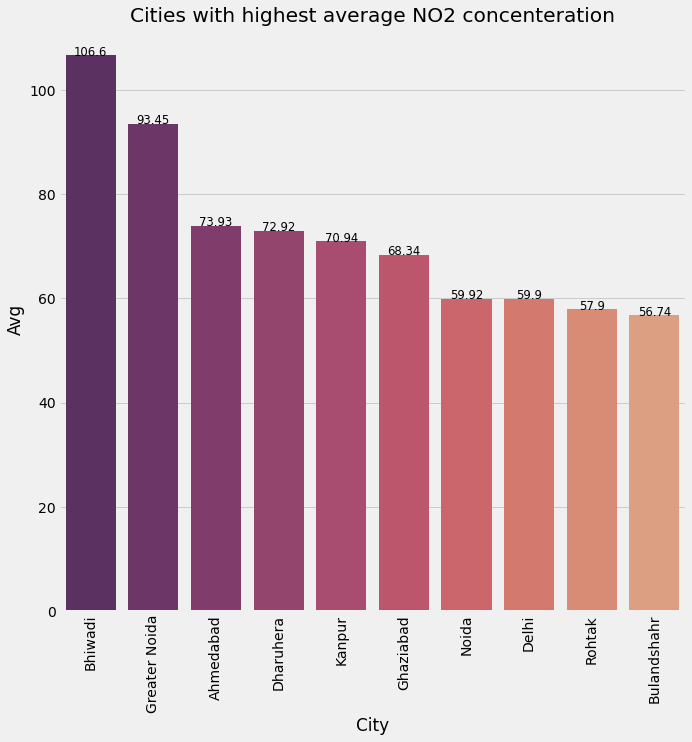

In [19]:
plt.figure(figsize=(10,10))
df_avg_top10 = df_avg.sort_values(by = 'Avg' ,ascending =False).head(10).reset_index()
pal = reversed(sns.color_palette('flare', len(df_avg_top10)))
g=sns.barplot(x='City',y='Avg',data=df_avg_top10, palette=pal)

for index, row in df_avg_top10.iterrows():
    g.text(row.name,row.Avg, round(row.Avg,2), color='black', ha="center",size = 'small')
    
plt.title('Cities with highest average NO2 concenteration')
plt.xticks(rotation = 90)
plt.show()

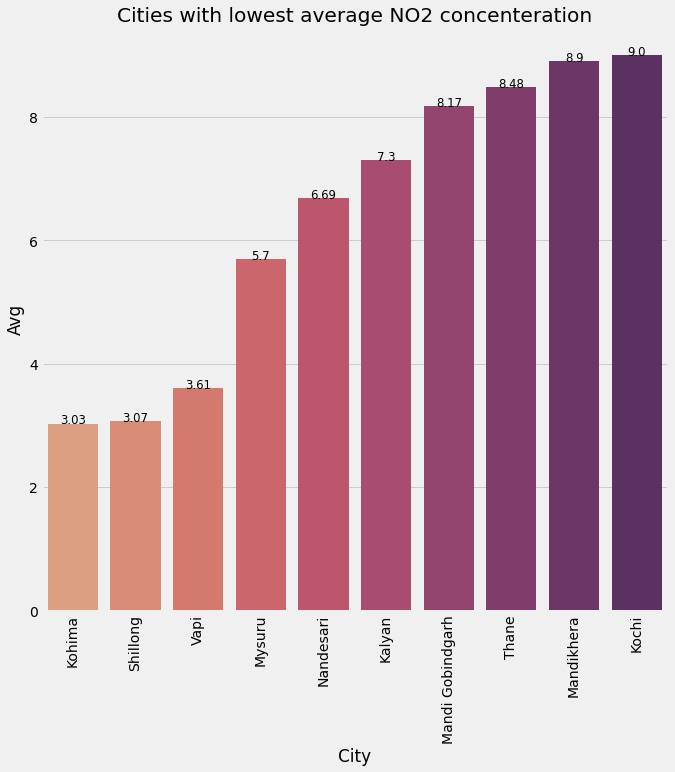

In [20]:
plt.figure(figsize=(10,10))
df_avg_last10 = df_avg.sort_values(by = 'Avg' ,ascending =False).dropna().tail(10).sort_values(by = 'Avg').reset_index()
g=sns.barplot(x='City',y='Avg',data=df_avg_last10, palette='flare')

for index, row in df_avg_last10.iterrows():
    g.text(row.name,row.Avg, round(row.Avg,2), color='black', ha="center",size = 'small')
    
plt.title('Cities with lowest average NO2 concenteration')
plt.xticks(rotation = 90)
plt.show()

## DELHI

In [21]:
df_2 = df[cols].copy()
delhi = df_2.loc[df_2.City == 'Delhi'].copy()
print(delhi.shape)
delhi = delhi.reset_index(drop = True)
delhi = delhi.round(2)
delhi.head()

(300, 10)


,City,Coordinates,Time,Month,Hour,Date,Day,NO2_min,NO2_avg,NO2_max
0,Delhi,"[28.6273928, 77.1716954]",2020-09-22 14:00:00,9,14,22-09-2020,1,16.19,33.83,63.86
1,Delhi,"[28.6273928, 77.1716954]",2020-09-22 16:00:00,9,16,22-09-2020,1,16.00,33.97,64.89
2,Delhi,"[28.6273928, 77.1716954]",2020-09-22 19:00:00,9,19,22-09-2020,1,16.03,34.67,65.86
3,Delhi,"[28.6273928, 77.1716954]",2020-09-22 22:00:00,9,22,22-09-2020,1,16.03,35.22,69.25
4,Delhi,"[28.6273928, 77.1716954]",2020-09-23 04:00:00,9,4,23-09-2020,2,15.74,34.79,65.15


In [22]:
delhi.describe()

,Month,Hour,Day,NO2_min,NO2_avg,NO2_max
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,9.836667,13.053333,2.766667,25.771067,59.540700,99.544667
std,0.370287,5.458002,1.871871,4.071696,11.788543,18.066267
min,9.000000,0.000000,0.000000,15.260000,33.350000,63.860000
25%,10.000000,9.000000,1.000000,22.805000,50.555000,87.390000
50%,10.000000,13.000000,2.000000,25.660000,60.415000,101.085000
75%,10.000000,17.000000,4.000000,28.500000,68.090000,113.880000
max,10.000000,23.000000,6.000000,36.780000,81.230000,138.160000


### Taking only the time from 7 am to 10 pm

(265, 10)


<AxesSubplot:xlabel='Hour', ylabel='NO2_avg'>

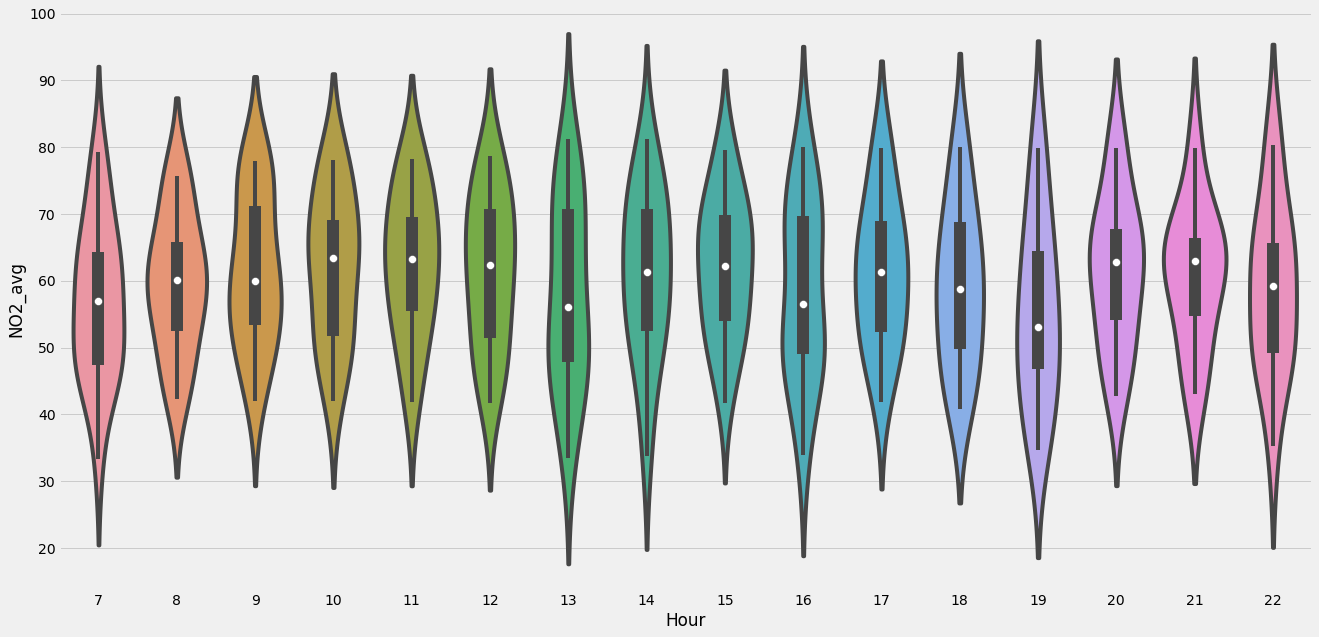

In [23]:
delhi = delhi[(delhi.Hour >= 7) & (delhi.Hour <= 22)]
print(delhi.shape)
plt.figure(figsize = (20,10))
sns.violinplot(y = 'NO2_avg',x = 'Hour',data = delhi)

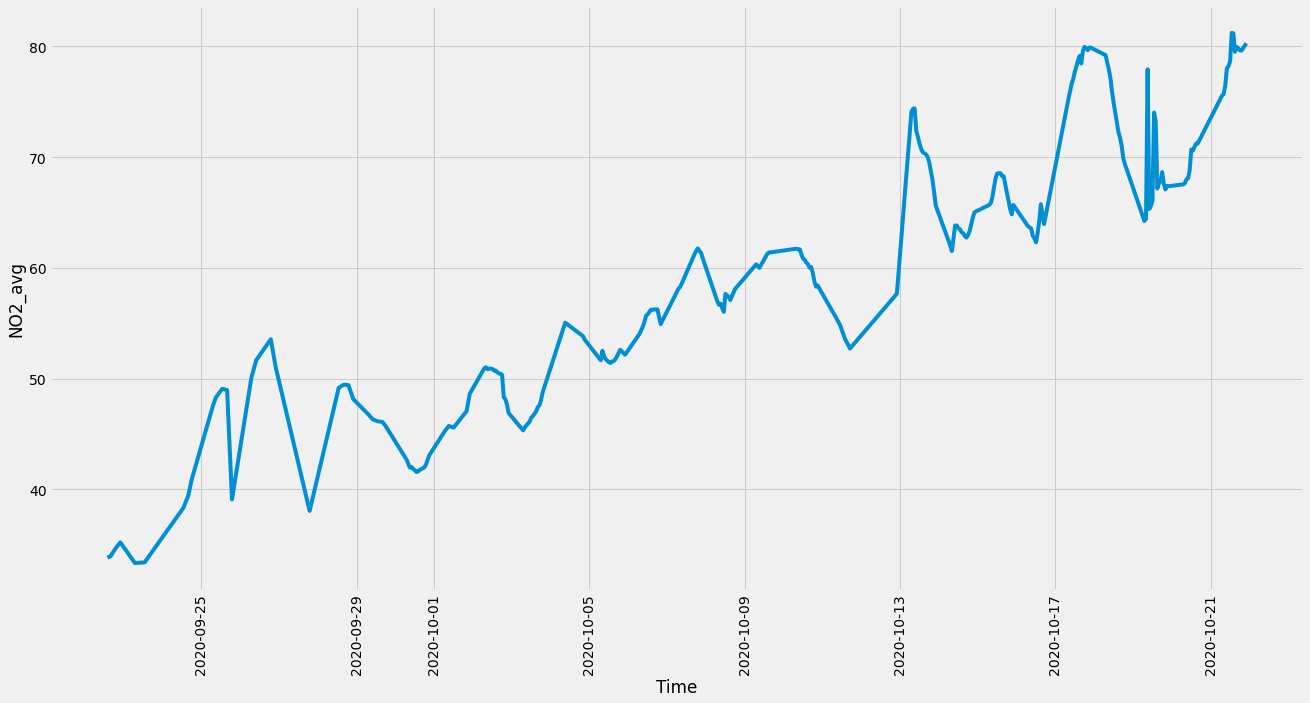

In [24]:
plt.figure(figsize = (20,10))
sns.lineplot(y = 'NO2_avg',x = 'Time',data = delhi,)
plt.xticks(rotation = 90)
plt.show()

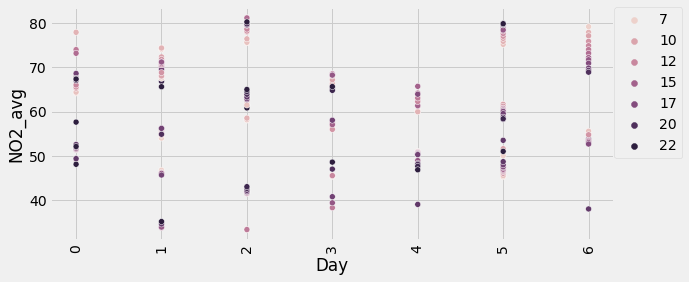

In [25]:
plt.figure(figsize = (9,4))
sns.scatterplot(y = 'NO2_avg',x = 'Day',hue = 'Hour',data = delhi) #color = ('#41cb89')
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0)
plt.xticks(rotation = 90)
plt.show()

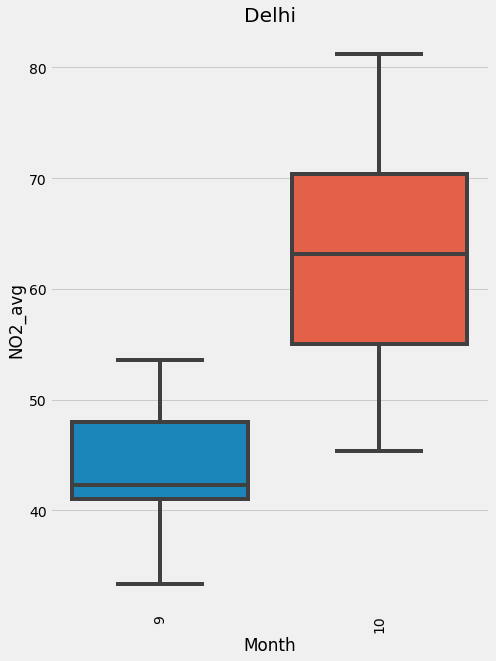

In [26]:
plt.figure(figsize = (7,10))
sns.boxplot(y = 'NO2_avg',x = 'Month',data = delhi)
plt.title('Delhi')
plt.xticks(rotation = 90)
plt.show()

In [27]:
delhi_sep = delhi[delhi.Month == 9].copy()
delhi_oct = delhi[delhi.Month == 10].copy()

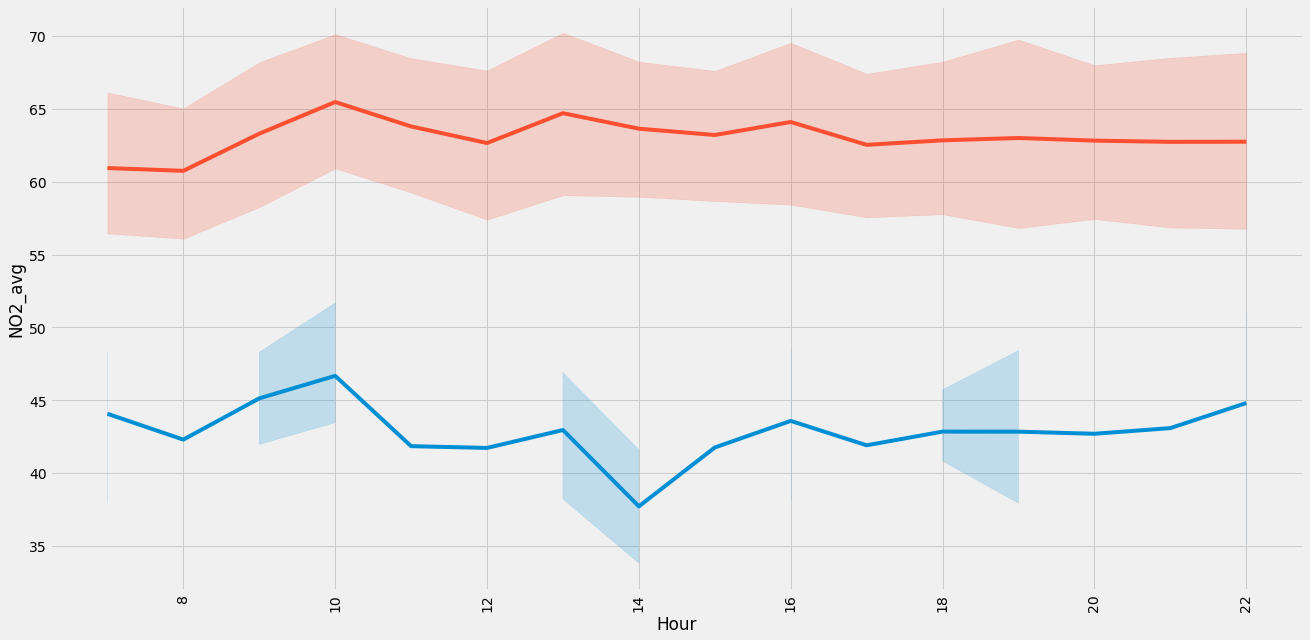

In [28]:
plt.figure(figsize = (20,10))
sns.lineplot(y = 'NO2_avg',x = 'Hour',data = delhi_sep)
sns.lineplot(y = 'NO2_avg',x = 'Hour',data = delhi_oct)
plt.xticks(rotation = 90)
plt.show()

## Mumbai

In [29]:
mum = df_2.loc[df_2.City == 'Mumbai'].copy()
mum = mum.reset_index(drop = True)
mum = mum.round(2)
mum.head()

,City,Coordinates,Time,Month,Hour,Date,Day,NO2_min,NO2_avg,NO2_max
0,Mumbai,"[18.9387711, 72.8353355]",2020-09-22 14:00:00,9,14,22-09-2020,1,8.62,19.88,33.62
1,Mumbai,"[18.9387711, 72.8353355]",2020-09-22 16:00:00,9,16,22-09-2020,1,11.56,21.67,36.11
2,Mumbai,"[18.9387711, 72.8353355]",2020-09-22 19:00:00,9,19,22-09-2020,1,8.00,20.89,36.67
3,Mumbai,"[18.9387711, 72.8353355]",2020-09-22 22:00:00,9,22,22-09-2020,1,5.88,17.25,30.75
4,Mumbai,"[18.9387711, 72.8353355]",2020-09-23 04:00:00,9,4,23-09-2020,2,4.56,15.44,30.67


In [30]:
mum.describe()

,Month,Hour,Day,NO2_min,NO2_avg,NO2_max
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,9.836667,13.053333,2.766667,8.601467,21.997133,46.127367
std,0.370287,5.458002,1.871871,2.487505,5.752611,13.536559
min,9.000000,0.000000,0.000000,3.000000,10.250000,21.250000
25%,10.000000,9.000000,1.000000,7.200000,17.780000,37.200000
50%,10.000000,13.000000,2.000000,8.220000,20.580000,43.255000
75%,10.000000,17.000000,4.000000,10.220000,25.620000,53.575000
max,10.000000,23.000000,6.000000,16.710000,38.170000,80.710000


(265, 10)


<AxesSubplot:xlabel='Hour', ylabel='NO2_avg'>

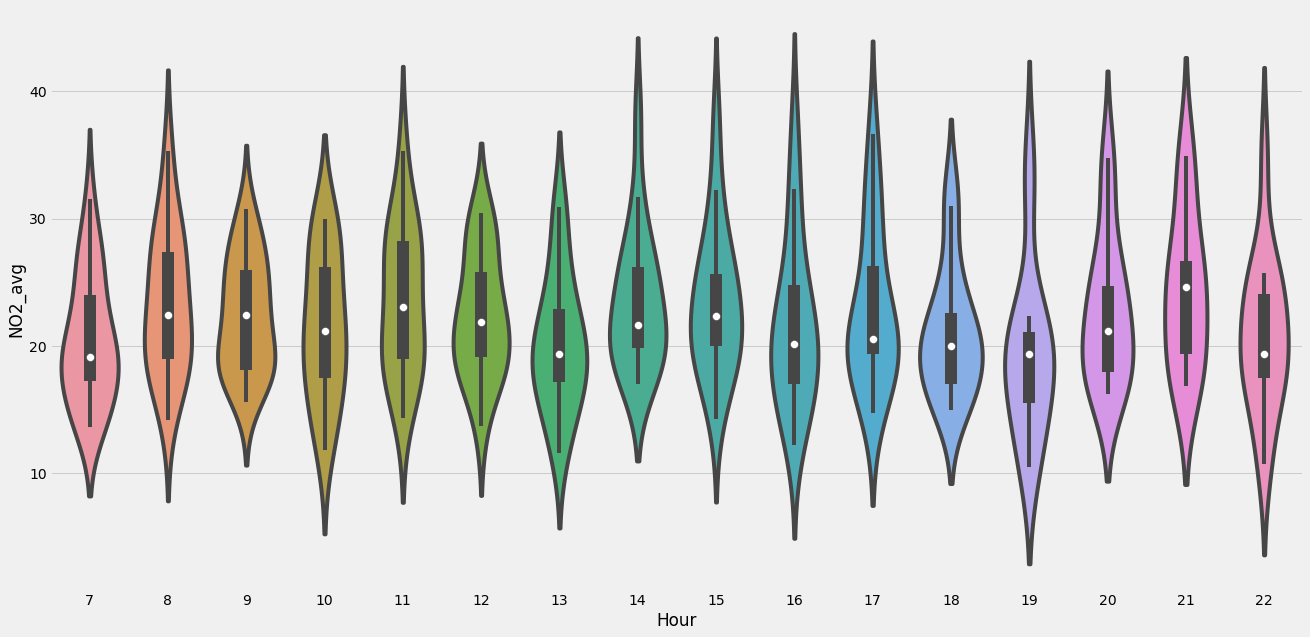

In [31]:
mum = mum[(mum.Hour >= 7) & (mum.Hour <= 22)]
print(mum.shape)
plt.figure(figsize = (20,10))
sns.violinplot(y = 'NO2_avg',x = 'Hour',data = mum)

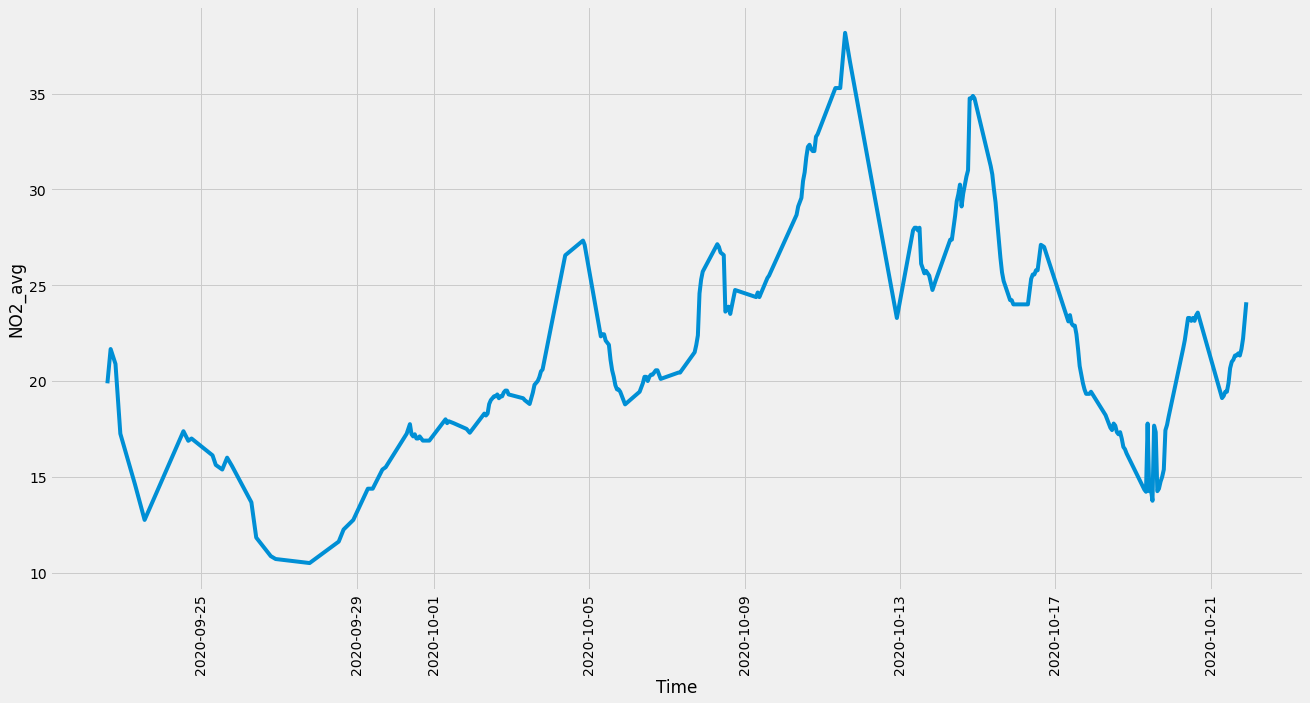

In [32]:
plt.figure(figsize = (20,10))
sns.lineplot(y = 'NO2_avg',x = 'Time',data = mum)
plt.xticks(rotation = 90)
plt.show()

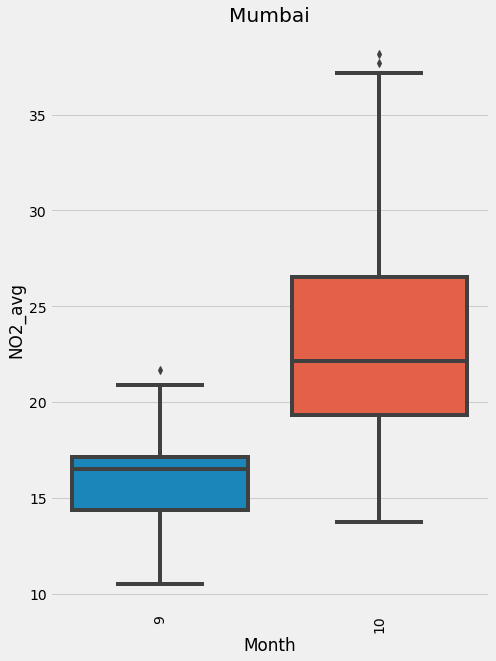

In [33]:
plt.figure(figsize = (7,10))
sns.boxplot(y = 'NO2_avg',x = 'Month',data = mum)
plt.title('Mumbai')
plt.xticks(rotation = 90)
plt.show()

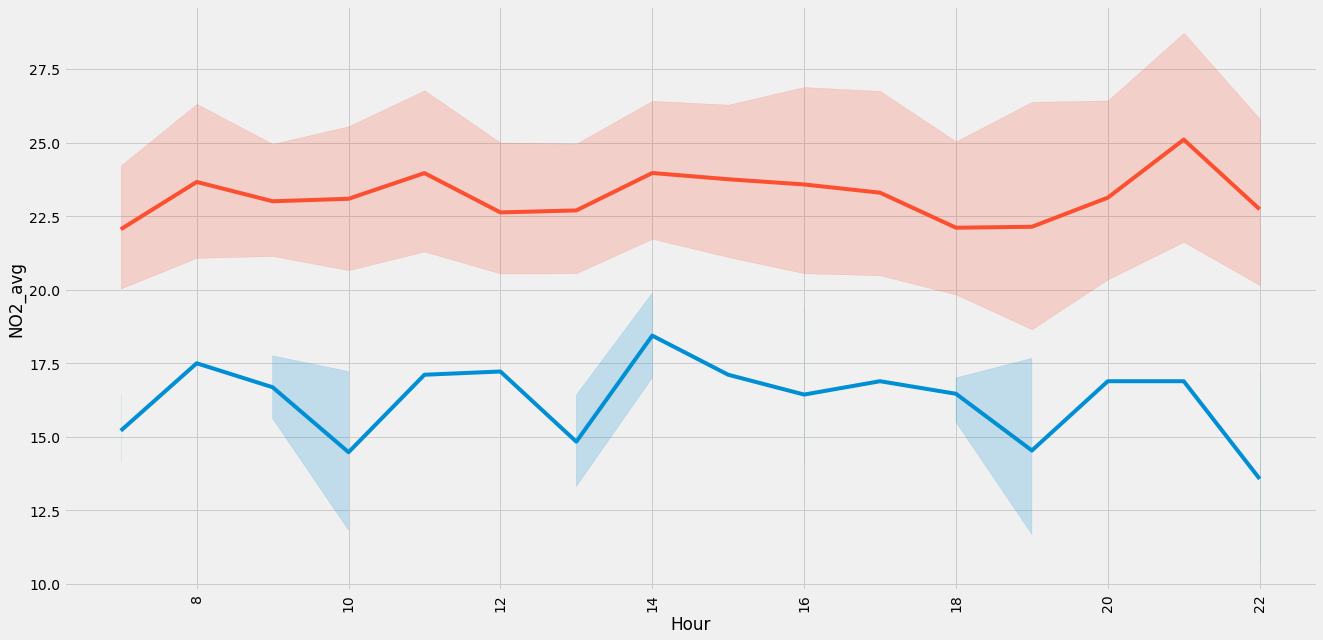

In [34]:
mum_sep = mum[mum.Month == 9].copy()
mum_oct = mum[mum.Month == 10].copy()
plt.figure(figsize = (20,10))
sns.lineplot(y = 'NO2_avg',x = 'Hour',data = mum_sep)
sns.lineplot(y = 'NO2_avg',x = 'Hour',data = mum_oct)
plt.xticks(rotation = 90)
plt.show()